In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb 
plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [61]:
CJL = pd.read_csv("CJL.csv")
Rikou = pd.read_csv("Rikou.csv")
SILS = pd.read_csv("SILS.csv")
SSS = pd.read_csv("SSS.csv")

In [62]:
SILS['day'] = SILS['Day (1)'].map(NumOfWeek)
SSS['day'] = SSS['Day (1)'].map(NumOfWeek)

# CJL

In [27]:
CJL

,Course Name,Course Lowest Level,Course Highest Level,Instructor's Name,Semester,Day (1),Period (1),Day (2),Period (2),Day (3),Period (3),Overall Satisfaction,Difficulty of achieving high score,Is the class beneficial,Overall comment and evaluation regarding the class/instructor
0,旅行で学ぶ,2,3,森元桂子,Full Year,Tuesday,3,NaN,NaN,NaN,NaN,4,4,4,教授人很好，作業算偏多的，然後很多同學都是低填，但基本上只要該做的有做要拿高分不難。
1,文法トレーニング,1,1,今井 新悟,Full Year,Tuesday,4,NaN,NaN,NaN,NaN,1,5,1,什麼也學不到的課，教授不上課，每次都做一樣的事。只要作業有交，考試有考基本上沒什麼問題，但真...
2,私とあなたで学ぶ,2,2,森元桂子、金龍男,Full Year,Wednesday,1,Wednesday,2.0,Friday,3.0,4,5,4,基本上出席率很重要，教授人都很好，可以遇到一堆超會講的人，如果不太敢講日文的人滿推的，會讓自...
3,自分表現でクラスメイトと日本語を学び合う,2,2,江原 恵美子,Full Year,Saturday,2,NaN,NaN,NaN,NaN,5,3,4,教授人很好，打分比較嚴格，但是看得出來他每次都很用心準備每一節課的東西。
4,Discussion & Speech through Reading Japanese S...,1,2,"FUKUSHIMA, Emiko",Fall,Wednesday,3,NaN,NaN,NaN,NaN,5,5,5,每週上課讀繪本（老師印的講義），有一個期中報告要介紹一本書，沒有期末。老師人超好，上課會有跟...
5,日本語の発音（リズム・アクセント・イントネーション）を学ぶ３－４,3,4,木下直子,Full Year,Wednesday,1,NaN,NaN,NaN,NaN,5,5,4,有的人可能會覺得上課內容很無聊，但其實可以學到很多發音相關的內容，期末考是選一段影片配音，老...
6,Express yourself in Japanese by collaborative ...,2,2,"EBARA, Mieko",Fall,Friday,2,NaN,NaN,NaN,NaN,5,4,4,老師很活潑有活力，講課時會以一點點英文輔助。每堂都會點名。上課一開始通常會玩小遊戲，然後會做...
7,"Understanding Japanese Society: Watching, Summ...",4,5,Yuka Nishibe,Full Year,Monday,4,NaN,NaN,NaN,NaN,5,5,5,極充實的一堂課，作業量較重，但非常值得。教授將每堂課安排得妥妥當當，每週有宿題，一學期有三次...
8,Conversation Practice: Talking about Yourself,3,4,Michiko Kumada,Fall,Tuesday,2,NaN,NaN,NaN,NaN,5,5,4,出席率看很重，上課主要與同學練習會話，可混可認真，每週都有宿題，一學期兩次發表，不太敢開口講...
9,Learn practical kanji vocabulary by life mapping,3,5,Mieko Ebara,Fall,Friday,3,NaN,NaN,NaN,NaN,3,5,2,出席率看很重，水分十足的一堂課，想交朋友的可以選這堂，一學期一次團體發表，兩個レポート，レポ...


In [37]:
CJL['Overall Satisfaction'].describe()

count    12.000000
mean      4.083333
std       1.378954
min       1.000000
25%       3.750000
50%       5.000000
75%       5.000000
max       5.000000
Name: Overall Satisfaction, dtype: float64

In [38]:
CJL.columns

Index(['Course Name', 'Course Lowest Level', 'Course Highest Level',
       'Instructor's Name', 'Semester', 'Day (1)', 'Period (1)', 'Day (2)',
       'Period (2)', 'Day (3)', 'Period (3)', 'Overall Satisfaction',
       'Difficulty of achieving high score', 'Is the class beneficial',
       'Overall comment and evaluation regarding the class/instructor'],
      dtype='object')

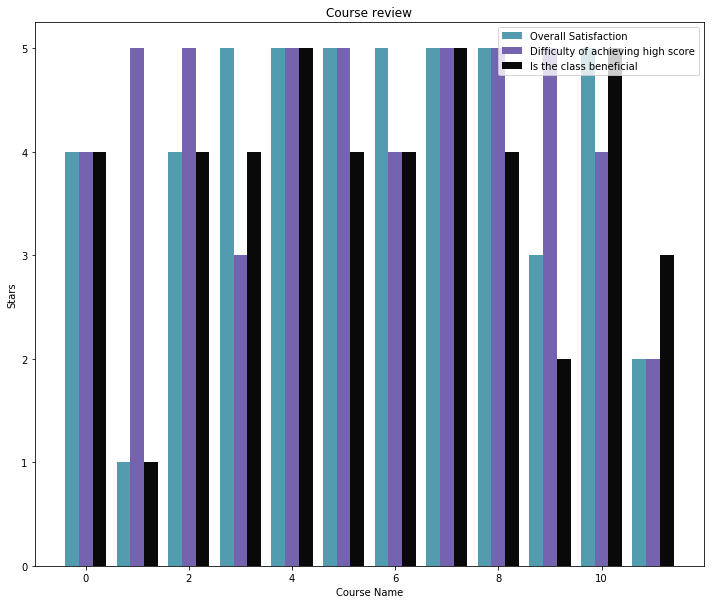

In [39]:
# Grouped bar plot
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# 调用绘图函数
groupedbarplot(x_data = CJL.index.values
               , y_data_list = [CJL["Overall Satisfaction"],CJL["Difficulty of achieving high score"],CJL["Is the class beneficial"]]
               , y_data_names = ['Overall Satisfaction', 'Difficulty of achieving high score','Is the class beneficial']
               , colors = ['#539caf', '#7663b0','#090909']
               , x_label = 'Course Name'
               , y_label = 'Stars'
               , title = 'Course review')

In [40]:
CJL_score = CJL.loc[:,['Course Name', 'Period (1)','Overall Satisfaction','Difficulty of achieving high score','Is the class beneficial']]
CJL_score

,Course Name,Period (1),Overall Satisfaction,Difficulty of achieving high score,Is the class beneficial
0,旅行で学ぶ,3,4,4,4
1,文法トレーニング,4,1,5,1
2,私とあなたで学ぶ,1,4,5,4
3,自分表現でクラスメイトと日本語を学び合う,2,5,3,4
4,Discussion & Speech through Reading Japanese S...,3,5,5,5
5,日本語の発音（リズム・アクセント・イントネーション）を学ぶ３－４,1,5,5,4
6,Express yourself in Japanese by collaborative ...,2,5,4,4
7,"Understanding Japanese Society: Watching, Summ...",4,5,5,5
8,Conversation Practice: Talking about Yourself,2,5,5,4
9,Learn practical kanji vocabulary by life mapping,3,3,5,2


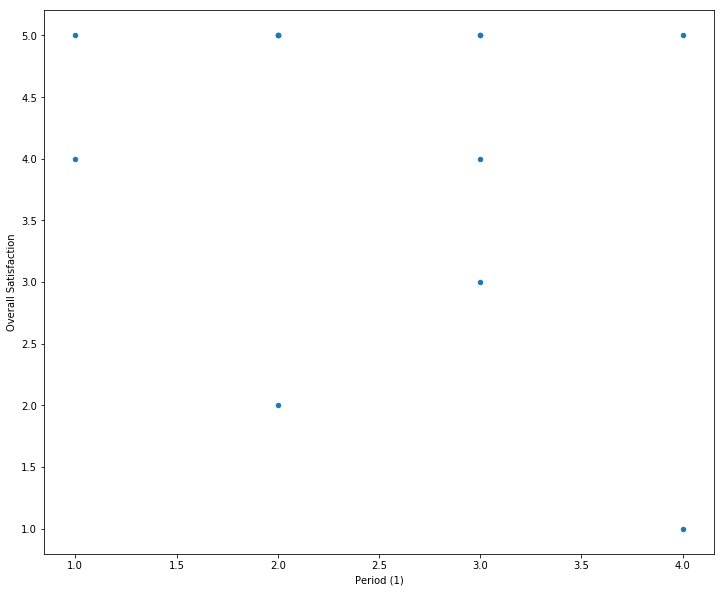

In [41]:
# See correlation of class period with 
CJL_score.plot.scatter(x = 'Period (1)', y = 'Overall Satisfaction')

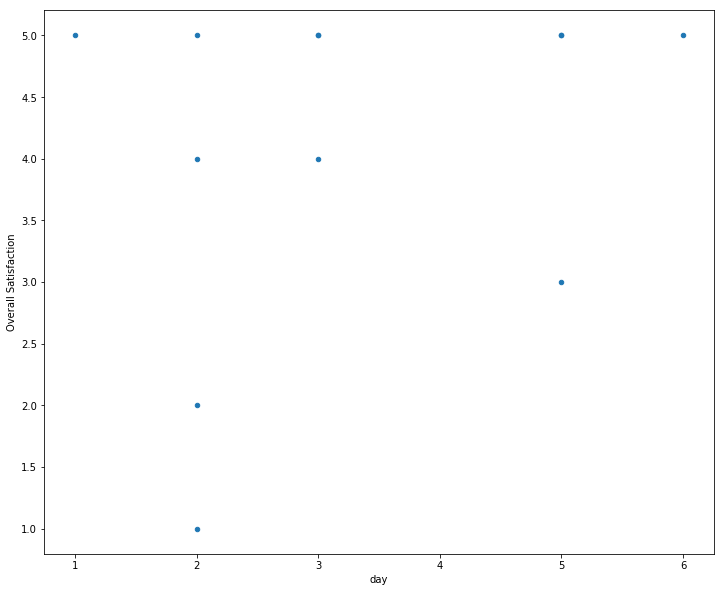

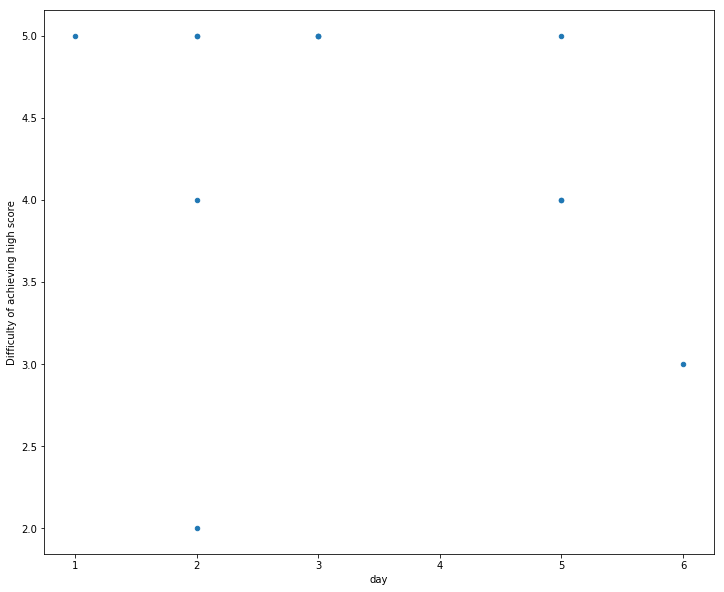

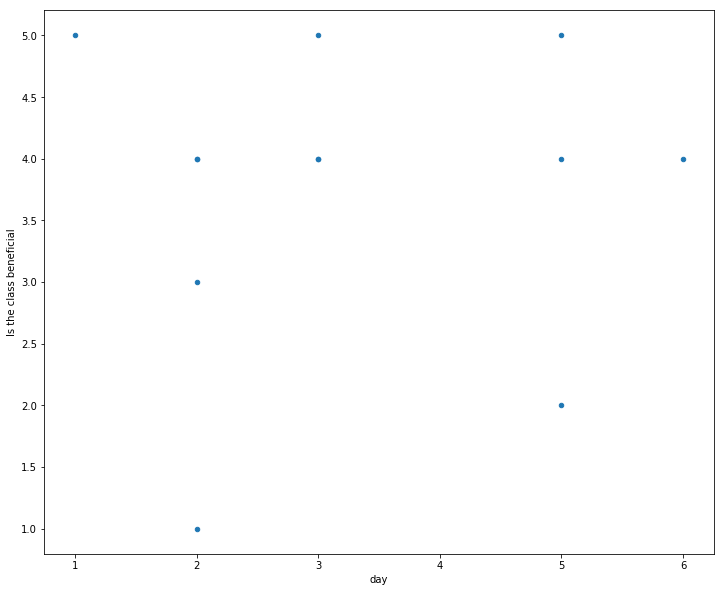

In [42]:
# correlation of day period with Overall Satisfaction
import datetime as dt
NumOfWeek={'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
CJL['day'] = CJL['Day (1)'].map(NumOfWeek)
CJL.plot.scatter(x = 'day', y = 'Overall Satisfaction')
CJL.plot.scatter(x = 'day', y = 'Difficulty of achieving high score')
CJL.plot.scatter(x = 'day', y = 'Is the class beneficial')


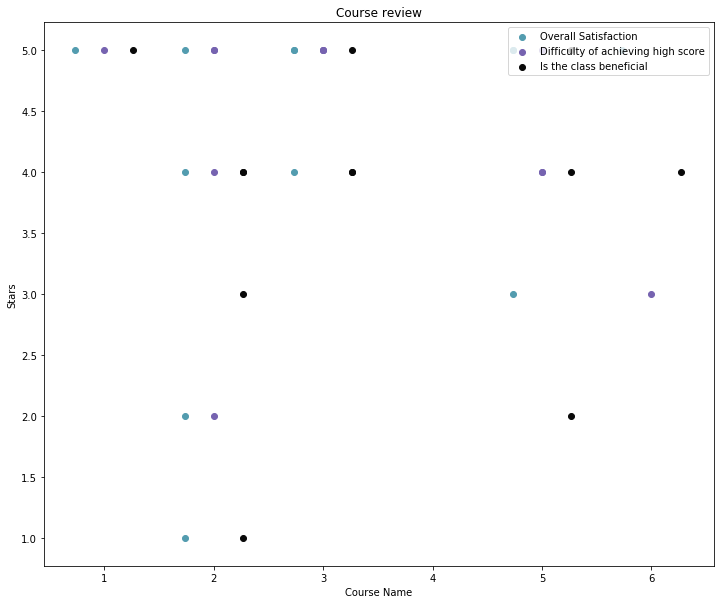

In [43]:
# Grouped scatter plot
def groupedscatterplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.scatter(x_data + alteration[i], y_data_list[i], color = colors[i]) #label = y_data_names[i], width = ind_width
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# 调用绘图函数
groupedscatterplot(x_data = CJL['day']
               , y_data_list = [CJL["Overall Satisfaction"],CJL["Difficulty of achieving high score"],CJL["Is the class beneficial"]]
               , y_data_names = ['Overall Satisfaction', 'Difficulty of achieving high score','Is the class beneficial']
               , colors = ['#539caf', '#7663b0','#090909']
               , x_label = 'Course Name'
               , y_label = 'Stars'
               , title = 'Course review')

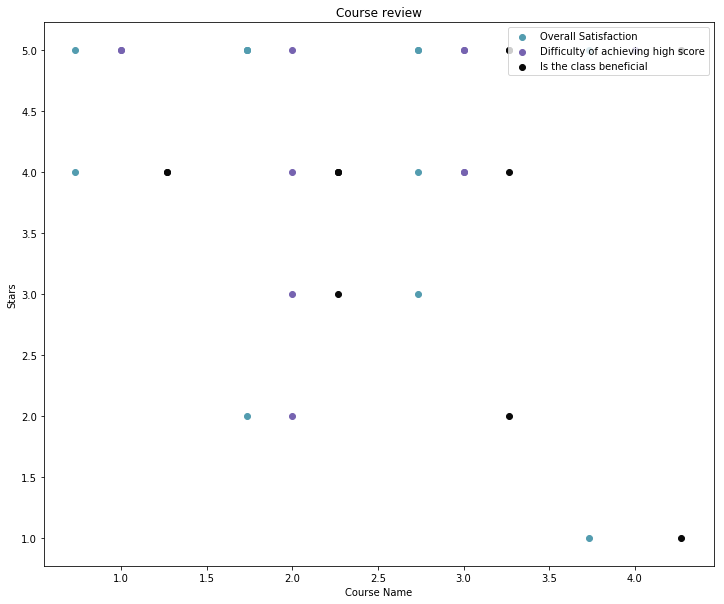

In [57]:

# Grouped scatter plot
def groupedscatterplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.scatter(x_data + alteration[i], y_data_list[i], color = colors[i]) #label = y_data_names[i], width = ind_width
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# 调用绘图函数
groupedscatterplot(x_data = CJL['Period (1)']
               , y_data_list = [CJL["Overall Satisfaction"],CJL["Difficulty of achieving high score"],CJL["Is the class beneficial"]]
               , y_data_names = ['Overall Satisfaction', 'Difficulty of achieving high score','Is the class beneficial']
               , colors = ['#539caf', '#7663b0','#090909']
               , x_label = 'Course Name'
               , y_label = 'Stars'
               , title = 'Course review')

In [47]:
CJL.head()

,Course Name,Course Lowest Level,Course Highest Level,Instructor's Name,Semester,Day (1),Period (1),Day (2),Period (2),Day (3),Period (3),Overall Satisfaction,Difficulty of achieving high score,Is the class beneficial,Overall comment and evaluation regarding the class/instructor,day
0,旅行で学ぶ,2,3,森元桂子,Full Year,Tuesday,3,NaN,NaN,NaN,NaN,4,4,4,教授人很好，作業算偏多的，然後很多同學都是低填，但基本上只要該做的有做要拿高分不難。,2
1,文法トレーニング,1,1,今井 新悟,Full Year,Tuesday,4,NaN,NaN,NaN,NaN,1,5,1,什麼也學不到的課，教授不上課，每次都做一樣的事。只要作業有交，考試有考基本上沒什麼問題，但真...,2
2,私とあなたで学ぶ,2,2,森元桂子、金龍男,Full Year,Wednesday,1,Wednesday,2.0,Friday,3.0,4,5,4,基本上出席率很重要，教授人都很好，可以遇到一堆超會講的人，如果不太敢講日文的人滿推的，會讓自...,3
3,自分表現でクラスメイトと日本語を学び合う,2,2,江原 恵美子,Full Year,Saturday,2,NaN,NaN,NaN,NaN,5,3,4,教授人很好，打分比較嚴格，但是看得出來他每次都很用心準備每一節課的東西。,6
4,Discussion & Speech through Reading Japanese S...,1,2,"FUKUSHIMA, Emiko",Fall,Wednesday,3,NaN,NaN,NaN,NaN,5,5,5,每週上課讀繪本（老師印的講義），有一個期中報告要介紹一本書，沒有期末。老師人超好，上課會有跟...,3


In [50]:
import jieba 
from collections import Counter

# split tokens 
def stripdata(Test):
    seg_list = jieba.cut(Test) 
    counts = Counter(seg_list)
    return counts

CJL["SplitTokens"] = CJL["Overall comment and evaluation regarding the class/instructor"].apply(stripdata)



Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/k8/j7g2q3kx6gn29gc2zy3gfvhw0000gn/T/jieba.cache
Loading model cost 0.814 seconds.
Prefix dict has been built successfully.


In [51]:
CJL["SplitTokens"] 

0     {'教授': 1, '人': 1, '很': 1, '好': 1, '，': 3, '作業算...
1     {'什麼': 1, '也': 1, '學': 1, '不到': 1, '的': 2, '課'...
2     {'基本上': 1, '出席率': 1, '很': 2, '重要': 1, '，': 4, ...
3     {'教授': 1, '人': 1, '很': 2, '好': 1, '，': 2, '打分'...
4     {'每週': 1, '上': 2, '課讀': 1, '繪本': 1, '（': 1, '老...
5     {'有': 1, '的': 2, '人': 2, '可能': 1, '會覺': 1, '得'...
6     {'老師': 1, '很': 1, '活潑': 1, '有': 2, '活力': 1, '，...
7     {'極充實': 1, '的': 3, '一堂': 1, '課': 2, '，': 8, '作...
8     {'出席率': 1, '看': 1, '很重': 1, '，': 5, '上課': 1, '...
9     {'出席率': 1, '看': 1, '很重': 1, '，': 8, '水分': 1, '...
10    {'作業': 2, '：': 3, '偶爾': 1, '
': 7, '考試': 1, '無...
11    {'老師會給': 1, '同學近': 1, '三四年': 1, '的': 6, '日本': ...
Name: SplitTokens, dtype: object

# Rikou

In [52]:
Rikou.describe

<bound method NDFrame.describe of                                           Course Type School  \
0                                A2 Foreign Languages    NaN   
1                                 B1 Core Mathematics    NaN   
2   B2 Natural Science (Physics / Chemistry / Life...    NaN   
3                                      B1 Mathematics    NaN   
4                                      B1 Mathematics    NaN   
5   B2 Natural Science (Physics / Chemistry / Life...    NaN   
6                              B4 Information Science    NaN   
7                              B4 Information Science    NaN   
8                                      B1 Mathematics    NaN   
9                                  C Elective Courses    FSE   
10                        C Elective Required Courses    FSE   
11                        C Elective Required Courses    FSE   

    Lowest Eligible Year                                   Course Name  \
0                    NaN                                 Ja

In [53]:
Rikou.head()

,Course Type,School,Lowest Eligible Year,Course Name,Instructor's Name,Semester,Day (1),Period (1),Day (2),Period (2),Overall Satisfaction,Difficulty of achieving high score,Is the class beneficial,Overall comment and evaluation regarding the class/instructor
0,A2 Foreign Languages,NaN,NaN,Japanese 1(1),Sano Kaori,Fall,Wednesday,1,Wednesday,2.0,3,5,3,真的是非常基礎的日文課。老師也不太會仔細說明各文法的用法，比較重視實用所以課堂小活動很多。老...
1,B1 Core Mathematics,NaN,NaN,Calculus A (2),Shuichi Kawashima,Fall Quarter,Tuesday,1,Wednesday,3.0,4,5,3,老師人很好也很認真，不過英文不太好也不太會解釋。上課基本上就是一直抄筆記。考試內容都是從筆記...
2,B2 Natural Science (Physics / Chemistry / Life...,NaN,NaN,General Chemistry A (2),"GUEGAN, Regis",Fall Quarter,Monday,1,Thursday,5.0,4,5,3,老師人超級好。內容就是高中課程的英文版。
3,B1 Mathematics,NaN,2.0,Ordinary Differential Equations,"DOU, Xiaoling",Fall,Monday,2,NaN,NaN,4,4,3,老師是中國人 也就是說可以在課後用中文諮詢 評分是看平時的功課跟期中期末 總體而言不是很難 ...
4,B1 Mathematics,NaN,2.0,Discrete Mathematics,"FUJIWARA, Makoto",Fall,Thursday,3,NaN,NaN,4,5,4,老師其實不太會教 雖然人很好 但是他的給分很寬鬆 因為他說他不想當掉任何人


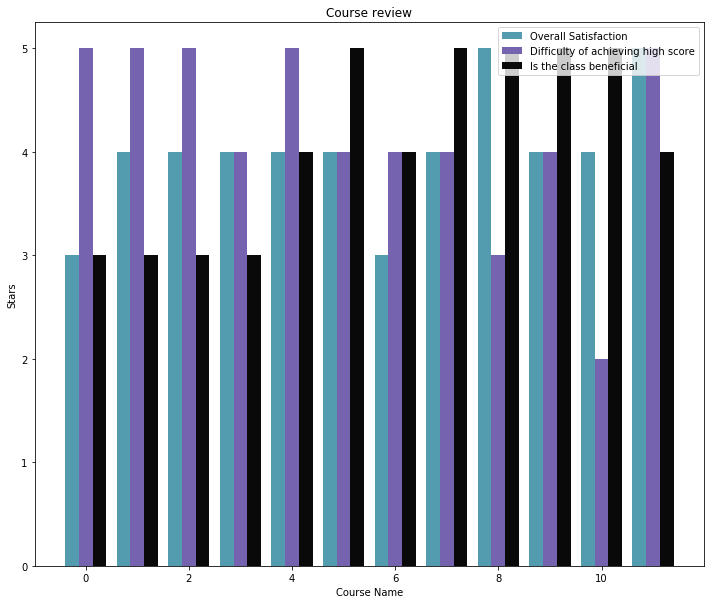

In [67]:
# Grouped bar plot
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# 调用绘图函数
groupedbarplot(x_data = Rikou.index.values
               , y_data_list = [Rikou["Overall Satisfaction"],Rikou["Difficulty of achieving high score"],Rikou["Is the class beneficial"]]
               , y_data_names = ['Overall Satisfaction', 'Difficulty of achieving high score','Is the class beneficial']
               , colors = ['#539caf', '#7663b0','#090909']
               , x_label = 'Course Name'
               , y_label = 'Stars'
               , title = 'Course review')

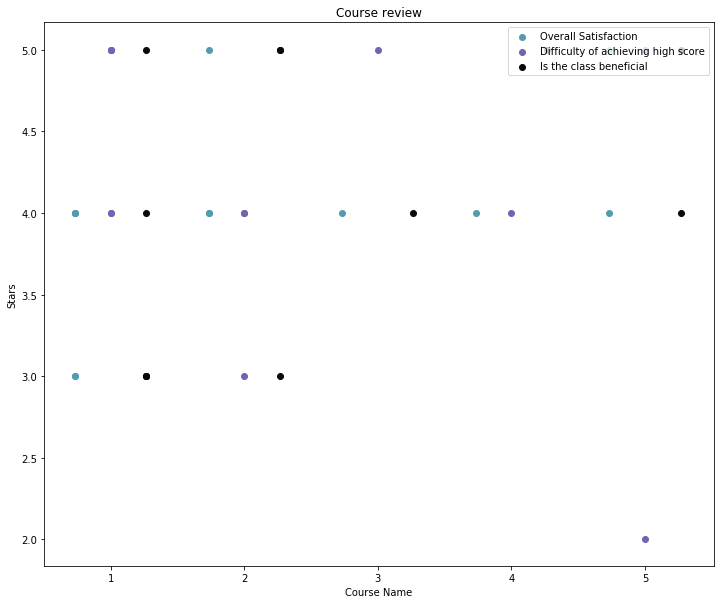

In [58]:
# 调用绘图函数
groupedscatterplot(x_data = Rikou['Period (1)']
               , y_data_list = [Rikou["Overall Satisfaction"],Rikou["Difficulty of achieving high score"],Rikou["Is the class beneficial"]]
               , y_data_names = ['Overall Satisfaction', 'Difficulty of achieving high score','Is the class beneficial']
               , colors = ['#539caf', '#7663b0','#090909']
               , x_label = 'Course Name'
               , y_label = 'Stars'
               , title = 'Course review')

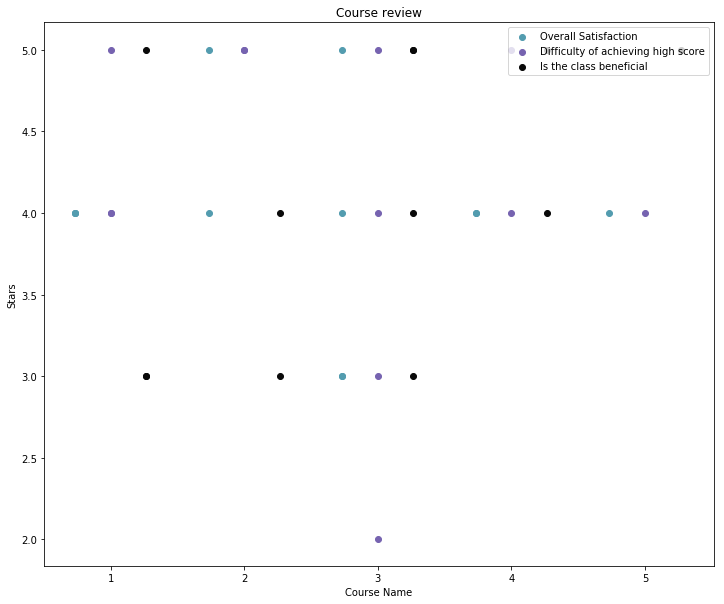

In [59]:
Rikou['day'] = Rikou['Day (1)'].map(NumOfWeek)
groupedscatterplot(x_data = Rikou['day']
               , y_data_list = [Rikou["Overall Satisfaction"],Rikou["Difficulty of achieving high score"],Rikou["Is the class beneficial"]]
               , y_data_names = ['Overall Satisfaction', 'Difficulty of achieving high score','Is the class beneficial']
               , colors = ['#539caf', '#7663b0','#090909']
               , x_label = 'Course Name'
               , y_label = 'Stars'
               , title = 'Course review')

In [60]:
Rikou["SplitTokens"] = Rikou["Overall comment and evaluation regarding the class/instructor"].apply(stripdata)
Rikou["SplitTokens"]

0     {'真的': 1, '是': 1, '非常': 1, '基礎': 1, '的': 2, '日...
1     {'老師': 1, '人': 1, '很': 2, '好': 1, '也': 2, '認真'...
2     {'老師': 1, '人': 1, '超級': 1, '好': 1, '。': 2, '內容...
3     {'老師': 2, '是': 2, '中國人': 1, ' ': 5, '也': 1, '就...
4     {'老師': 1, '其實': 1, '不太會教': 1, ' ': 3, '雖然': 1,...
5     {'老師': 1, '人': 1, '非常': 2, '好': 2, ' ': 5, '雖然...
6     {'跟': 3, '其他': 1, '程式': 1, '課一樣': 1, '每次': 2, ...
7     {'去年': 1, '是': 2, '星期四': 1, '一限': 1, '，': 8, '...
8     {'Mark': 1, '數學大': 1, '老好': 1, '老師': 1, '～': 1...
9     {'這個': 1, '老師': 2, '是採': 1, '取自': 1, '我評': 1, ...
10    {'是': 1, '一門': 1, '需要': 1, '用到': 1, '微分方程': 1,...
11    {'這堂': 2, '課': 2, '主要': 1, '教': 1, '的': 4, '是'...
Name: SplitTokens, dtype: object

# SILS

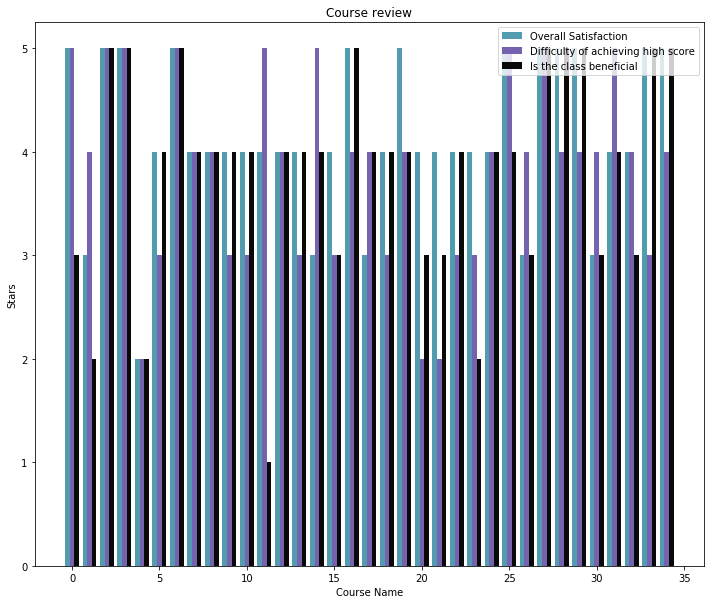

In [68]:
groupedbarplot(x_data = SILS.index.values
               , y_data_list = [SILS["Overall Satisfaction"],SILS["Difficulty of achieving high score"],SILS["Is the class beneficial"]]
               , y_data_names = ['Overall Satisfaction', 'Difficulty of achieving high score','Is the class beneficial']
               , colors = ['#539caf', '#7663b0','#090909']
               , x_label = 'Course Name'
               , y_label = 'Stars'
               , title = 'Course review')

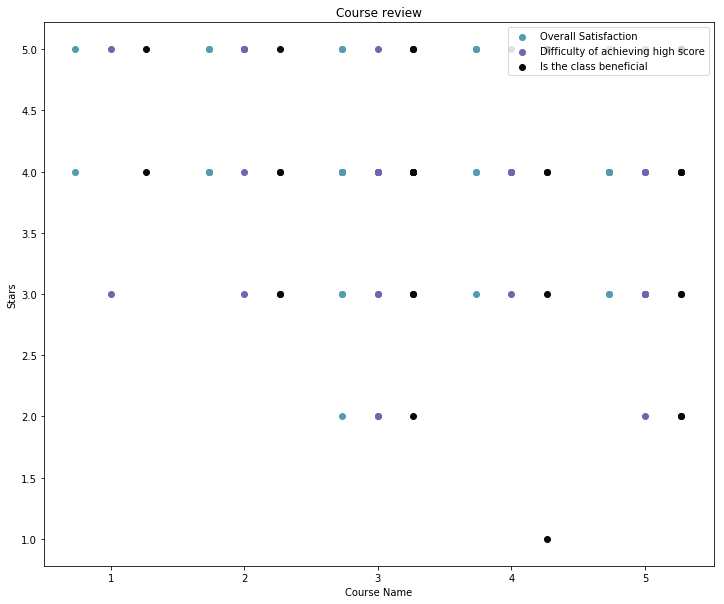

In [69]:
groupedscatterplot(x_data = SILS['Period (1)']
               , y_data_list = [SILS["Overall Satisfaction"],SILS["Difficulty of achieving high score"],SILS["Is the class beneficial"]]
               , y_data_names = ['Overall Satisfaction', 'Difficulty of achieving high score','Is the class beneficial']
               , colors = ['#539caf', '#7663b0','#090909']
               , x_label = 'Course Name'
               , y_label = 'Stars'
               , title = 'Course review')

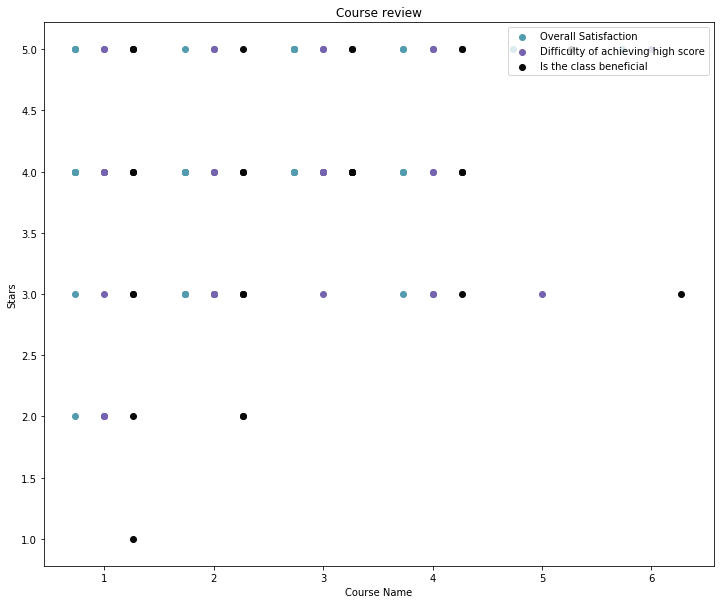

In [70]:
groupedscatterplot(x_data = SILS['day']
               , y_data_list = [SILS["Overall Satisfaction"],SILS["Difficulty of achieving high score"],SILS["Is the class beneficial"]]
               , y_data_names = ['Overall Satisfaction', 'Difficulty of achieving high score','Is the class beneficial']
               , colors = ['#539caf', '#7663b0','#090909']
               , x_label = 'Course Name'
               , y_label = 'Stars'
               , title = 'Course review')

In [72]:
SILS["SplitTokens"] = SILS["Overall comment and evaluation regarding the class/instructor"].apply(stripdata)
SILS["SplitTokens"]

0                          {'老師': 1, '很': 1, 'free': 1}
1     {'It': 1, '’': 2, 's': 1, ' ': 44, 'hard': 1, ...
2     {'對': 2, '於': 1, '基本': 1, '賽局': 1, '理論': 1, '有...
3     {'每學期': 1, '不': 2, '一': 1, '，': 9, '一週': 1, '上...
4     {'對': 1, '邏輯': 1, '證明': 2, '有': 2, '興趣': 1, '的...
5     {'對': 1, '於': 1, '微積': 1, '分有': 1, '興趣': 1, '的...
6     {'總體': 1, '經濟': 1, '入門': 1, '課內容': 1, '不會': 1,...
7     {'教授': 1, '很': 1, '認真': 1, '！': 1, '英文': 1, '也...
8     {'每次': 1, '上': 2, '完課': 1, '都': 2, '覺得': 1, '收...
9     {'Malcolm': 1, ' ': 1, '真的': 2, '是': 2, '很棒': ...
10    {'This': 1, ' ': 79, 'class': 3, 'will': 2, 'c...
11    {'這堂': 2, '課': 2, '老師會': 1, '講到': 1, '社會': 1, ...
12    {'雖然': 1, '老師': 3, '很': 3, '嚴格': 1, '，': 9, '上...
13    {'老師': 1, '非常': 1, '可愛': 1, '，': 8, '有': 1, '時...
14    {'這位': 1, '老師': 1, '講得': 1, '英文': 1, '，': 12, ...
15    {'每一節': 1, '課': 2, '都': 2, '會': 1, '介紹': 1, '有...
16    {'課程': 1, '有': 3, '不': 2, '有趣': 1, '看個': 1, '人...
17    {'教授': 1, '人': 1, '很': 2, '好': 1, '，': 8, 

# SSS

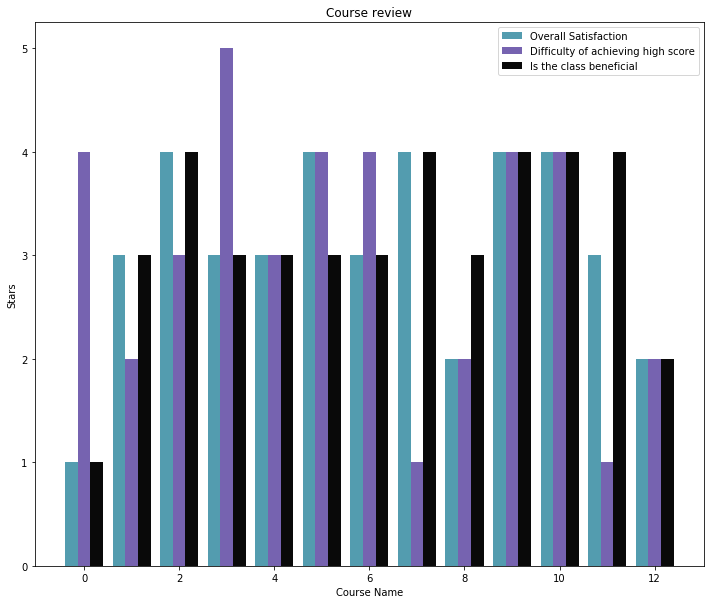

In [73]:
groupedbarplot(x_data = SSS.index.values
               , y_data_list = [SSS["Overall Satisfaction"],SSS["Difficulty of achieving high score"],SSS["Is the class beneficial"]]
               , y_data_names = ['Overall Satisfaction', 'Difficulty of achieving high score','Is the class beneficial']
               , colors = ['#539caf', '#7663b0','#090909']
               , x_label = 'Course Name'
               , y_label = 'Stars'
               , title = 'Course review')

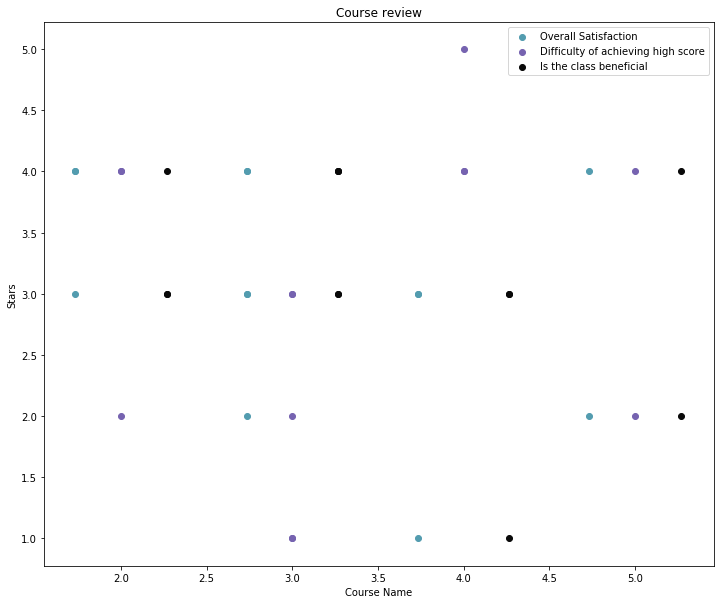

In [74]:
groupedscatterplot(x_data = SSS['Period (1)']
               , y_data_list = [SSS["Overall Satisfaction"],SSS["Difficulty of achieving high score"],SSS["Is the class beneficial"]]
               , y_data_names = ['Overall Satisfaction', 'Difficulty of achieving high score','Is the class beneficial']
               , colors = ['#539caf', '#7663b0','#090909']
               , x_label = 'Course Name'
               , y_label = 'Stars'
               , title = 'Course review')

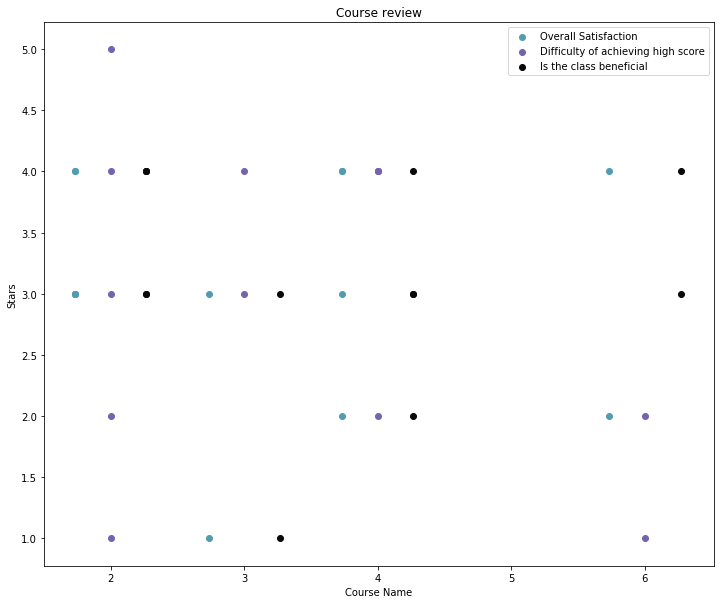

In [75]:
groupedscatterplot(x_data = SSS['day']
               , y_data_list = [SSS["Overall Satisfaction"],SSS["Difficulty of achieving high score"],SSS["Is the class beneficial"]]
               , y_data_names = ['Overall Satisfaction', 'Difficulty of achieving high score','Is the class beneficial']
               , colors = ['#539caf', '#7663b0','#090909']
               , x_label = 'Course Name'
               , y_label = 'Stars'
               , title = 'Course review')

In [76]:
Rikou["SplitTokens"] = Rikou["Overall comment and evaluation regarding the class/instructor"].apply(stripdata)
Rikou["SplitTokens"]

0     {'真的': 1, '是': 1, '非常': 1, '基礎': 1, '的': 2, '日...
1     {'老師': 1, '人': 1, '很': 2, '好': 1, '也': 2, '認真'...
2     {'老師': 1, '人': 1, '超級': 1, '好': 1, '。': 2, '內容...
3     {'老師': 2, '是': 2, '中國人': 1, ' ': 5, '也': 1, '就...
4     {'老師': 1, '其實': 1, '不太會教': 1, ' ': 3, '雖然': 1,...
5     {'老師': 1, '人': 1, '非常': 2, '好': 2, ' ': 5, '雖然...
6     {'跟': 3, '其他': 1, '程式': 1, '課一樣': 1, '每次': 2, ...
7     {'去年': 1, '是': 2, '星期四': 1, '一限': 1, '，': 8, '...
8     {'Mark': 1, '數學大': 1, '老好': 1, '老師': 1, '～': 1...
9     {'這個': 1, '老師': 2, '是採': 1, '取自': 1, '我評': 1, ...
10    {'是': 1, '一門': 1, '需要': 1, '用到': 1, '微分方程': 1,...
11    {'這堂': 2, '課': 2, '主要': 1, '教': 1, '的': 4, '是'...
Name: SplitTokens, dtype: object